# 1.Audio File Handling

## The mixer module plays an audio file.

In [11]:
from pygame import mixer

def play_sound(path):
    mixer.init()
    mixer.music.load(path)
    mixer.music.play()
    
play_sound(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction\cv-valid-train\cv-valid-train\sample-000000.mp3")

## Batch Conversion of Audio Files to WAV Format Using FFmpeg in Python

In [139]:
import subprocess
from os import listdir
from os.path import isfile, join

dirs = ["cv-valid-test", "cv-valid-train"]
for dir in dirs:
    print(dir)
    for file in listdir(join(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction", dir)):
        if isfile(join(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction", dir, file)):
            subprocess.call(['ffmpeg', '-i', join(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction", dir, file), join(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction", "wav-files", dir, "{}.wav".format(file[:-4]))])

cv-valid-test
cv-valid-train


# 2.Data Handling

## The dataset cv-valid-train.csv is loaded and cleaned (only rows with valid age values are kept).


In [5]:
import pandas as pd
from os import listdir
from os.path import join

def get_dataframe(path):
    df = pd.read_csv(path)
    return df[pd.notna(df['age'])]

df = get_dataframe(join(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction\cv-valid-train.csv"))
df.head(10)

,filename,text,up_votes,down_votes,age,gender,accent,duration
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,NaN
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,NaN
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,NaN
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,NaN
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,NaN
20,cv-valid-train/sample-000020.mp3,it was faintly marked with transverse stripes ...,5,1,thirties,male,england,NaN
23,cv-valid-train/sample-000023.mp3,i had seen all that it would presently bring me,5,0,thirties,male,us,NaN
26,cv-valid-train/sample-000026.mp3,two years ago right here on this spot i had a ...,4,0,twenties,female,australia,NaN
27,cv-valid-train/sample-000027.mp3,don't let them see that you're afraid the alch...,3,0,twenties,male,australia,NaN
29,cv-valid-train/sample-000029.mp3,the fire alarm went off again but when i looke...,1,0,thirties,male,indian,NaN


## Age and gender labels are extracted for each audio sample.

In [13]:
import numpy as np

def get_mp3_name(path):
    return "{}.mp3".format(path[:-4]).split("wav-files\\")[1].replace("\\", "/")

def get_age(df, path):
    path = get_mp3_name(path)
    return df.loc[df['filename'] == path]["age"].values[0]

gender_dict = {"male": -1, "female": +1, "other": 0}
def get_gender(df, path):
    path = get_mp3_name(path)
    try:
        gender = df.loc[df['filename'] == path]["gender"].values[0]
        return gender_dict[gender]
    except:
        return gender_dict["other"]
    

print(get_age(df, join("AgePrediction", "wav-files", "cv-valid-train", "sample-000020.wav")))
print(get_gender(df, join("AgePrediction", "wav-files", "cv-valid-train", "sample-000020.wav")))

thirties
-1


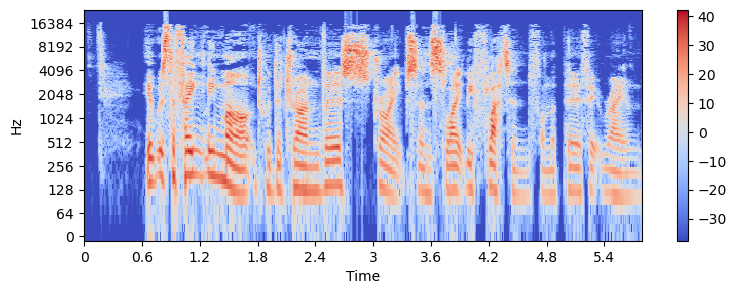

In [17]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def get_spectrogram(path, sampling_rate = 48000, display = True):
    # Load an audio file as a floating point time series.
    audio , _ = librosa.load(path, sr=sampling_rate)

    # Short-time Fourier transform (STFT).
    stft = abs(librosa.stft(audio))

    # Convert an amplitude spectrogram to dB-scaled spectrogram.
    spectrogram = librosa.amplitude_to_db(stft)

    if display:
        plt.figure(figsize=(9, 3))
        librosa.display.specshow(spectrogram, sr=sampling_rate, x_axis='time', y_axis='log')
        plt.colorbar()
    return spectrogram


_ = get_spectrogram(join(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction\wav-files\cv-valid-train\sample-000020.wav"))

## 3.Feature Extraction

## Audio features (e.g., spectral centroid, bandwidth, rolloff, MFCCs) are extracted using librosa.feature methods..

In [19]:
import sklearn

def feature_extraction(path, sampling_rate = 48000):
    features = list()
    audio, _ = librosa.load(path, sr=sampling_rate)
    
    gender = get_gender(df, path)
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sampling_rate))
    features.append(gender)
    features.append(spectral_centroid)
    features.append(spectral_bandwidth)
    features.append(spectral_rolloff)
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate)
    for el in mfcc:
        features.append(np.mean(el))
    
    return np.asarray(features, dtype=float)
    
        
features = feature_extraction(join(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction\wav-files\cv-valid-train\sample-000020.wav"))
print("features: ", features)
print("shape: ", features.shape)

features:  [-1.00000000e+00  3.96888241e+03  2.91259313e+03  6.71257769e+03
 -2.92293732e+02  9.61636734e+01 -5.19698219e+01  4.70044403e+01
 -1.41554766e+01  1.91763840e+01 -1.54273710e+01 -2.08400989e+00
 -2.30082798e+00 -9.36070442e+00 -6.94769239e+00 -6.13695145e+00
  6.40322399e+00 -8.66114712e+00 -3.53247952e+00 -2.82839203e+00
 -2.32284927e+00 -7.47378707e-01  6.56580448e-01 -9.12052822e+00]
shape:  (24,)


## A custom function (feature_extraction) combines these features with the gender label for each sample

In [31]:
import csv
from os.path import join

def get_wav_name(path):
    # Extract the WAV file path from the given path
    info = path.split("/")
    filename = join(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction\wav-files", info[0], "{}.wav".format(info[1][:-4]))
    return filename

def parse(row):
    # Extract features and label from a row
    features = feature_extraction(get_wav_name(row["filename"]))
    label = row["age"]
    return [features, label]

def create_header():
    # Create the CSV header for the feature file
    header = 'filename gender spectral_centroid spectral_bandwidth spectral_rolloff'
    for i in range(1, 21):
        header += ' mfcc{}'.format(i)
    header += ' label'
    header = header.split()
    return header

def create_feature_csv(csv_name, header):
    # Process the specified CSV file and create the feature CSV
    df = get_dataframe(join(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction", csv_name))
    output_file = join(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction", csv_name)
    
    # Write the header
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)
    
    # Process each row and extract features
    for index, row in df.iterrows():
        to_append = list()
        filename = row["filename"]
        features = feature_extraction(get_wav_name(row["filename"]))
        label = row["age"]
        to_append.append(filename)
        to_append.extend(features)
        to_append.append(label)
        
        # Append the features to the CSV file
        with open(output_file, 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(to_append)

# Set the header and process only 'cv-valid-train.csv'
header = create_header()
create_feature_csv("cv-valid-train.csv", header)


# 4.Preprocessing

In [33]:
data=pd.read_csv(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction\cv-valid-train.csv")

In [35]:
data.head()

,filename,gender,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,cv-valid-train/sample-000005.mp3,1.0,2679.939302,3347.669230,5745.486746,-625.218140,111.320938,6.326994,34.757614,31.619902,...,-10.702963,-11.202636,-12.003523,-8.489579,-5.463276,-4.954217,-3.715200,-6.330531,-6.338476,twenties
1,cv-valid-train/sample-000008.mp3,-1.0,2859.452074,2576.680218,4912.384969,-469.920441,126.275574,-16.554510,3.557193,2.179636,...,-10.984014,1.137729,6.090148,-1.733229,-1.226658,-6.425835,-7.262796,-4.797016,-3.135336,seventies
2,cv-valid-train/sample-000013.mp3,1.0,1976.264151,1830.634203,3344.655227,-418.205048,147.668320,-49.972744,-2.285531,37.187012,...,-13.845865,-9.927492,-7.871622,-5.473863,-2.295656,-6.554993,-5.206916,-0.407431,-3.882372,thirties
3,cv-valid-train/sample-000014.mp3,-1.0,2333.763596,2533.282996,4398.824257,-464.911224,118.436134,19.749296,27.143938,26.439018,...,-5.458494,-2.907650,-4.495940,-2.715732,-0.079106,-5.292979,-5.866175,0.601412,-3.376775,sixties
4,cv-valid-train/sample-000019.mp3,-1.0,2351.920593,2974.752406,4743.105301,-343.832214,157.152222,7.661032,41.899761,-15.152517,...,0.101558,6.319917,-1.603130,3.837097,-2.643987,2.324086,-1.383032,3.790379,-3.534915,fifties


## Features are scaled using StandardScaler, and the dataset is split into training, validation, and test sets.
## Labels are encoded using LabelEncoder.


In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def get_labels(data):
    labels = data.iloc[:, -1]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y, encoder = get_labels(data)
labels = encoder.classes_
print("labels: ", labels)

labels:  ['eighties' 'fifties' 'fourties' 'seventies' 'sixties' 'teens' 'thirties'
 'twenties']


In [39]:
def scale_features(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data.iloc[:, 1:-1], dtype = float))
    # with data.iloc[:, 1:-1] we don't consider filename and label

    # in this way, gender will be always -1, 0 or +1 and so it won't be scaled
    for i in range(len(scaled_data)):
        scaled_data[i][0] = data.iloc[i, 1]
        
    return scaled_data, scaler

x, scaler = scale_features(data)

In [41]:
# balanced split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=0, stratify=y_test)

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("x_val: ", x_val.shape)

x_train:  (59014, 24)
x_test:  (7377, 24)
x_val:  (7377, 24)


# 5.Model Building

## A deep neural network model is built using Keras (Sequential model with Dense layers, BatchNormalization, Dropout for regularization).

In [49]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.BatchNormalization(input_shape=(x_train.shape[1],)))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dense(8, activation='softmax'))  

C:\Users\Venu Mirapakayala\anaconda3\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 24)             │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │        25,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1024)           │         4,09

 Total params: 7,413,864 (28.28 MB)

 Trainable params: 7,397,432 (28.22 MB)

 Non-trainable params: 16,432 (64.19 KB)

None


## The model is trained with callbacks for early stopping and checkpointing (ModelCheckpoint, EarlyStopping).

In [55]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Use `.keras` as the file extension for saving the model
checkpointer = ModelCheckpoint(filepath='best_model.keras', 
                               verbose=1, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

In [57]:
epochs = 50
batch_size = 128
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[checkpointer, early_stopping],
                    validation_data=(x_val, y_val))

Epoch 1/50
461/462 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4199 - loss: 1.7942
Epoch 1: val_loss improved from inf to 1.06901, saving model to best_model.keras
462/462 ━━━━━━━━━━━━━━━━━━━━ 33s 62ms/step - accuracy: 0.4203 - loss: 1.7925 - val_accuracy: 0.6265 - val_loss: 1.0690
Epoch 2/50
461/462 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6084 - loss: 1.0980
Epoch 2: val_loss improved from 1.06901 to 0.92256, saving model to best_model.keras
462/462 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.6085 - loss: 1.0975 - val_accuracy: 0.6892 - val_loss: 0.9226
Epoch 3/50
461/462 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6827 - loss: 0.8907
Epoch 3: val_loss improved from 0.92256 to 0.77403, saving model to best_model.keras
462/462 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 0.6828 - loss: 0.8904 - val_accuracy: 0.7372 - val_loss: 0.7740
Epoch 4/50
461/462 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7176 - loss: 0.8112
Epoch 4: val_loss improved from 0.77403 to 0

# 6.Model Evaluation

## The model is evaluated on a test set, and accuracy/loss curves are plotted.

In [61]:
 model.load_weights('best_model.keras')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy: {0:.2f} %".format(test_acc*100))

Test accuracy: 90.58 %


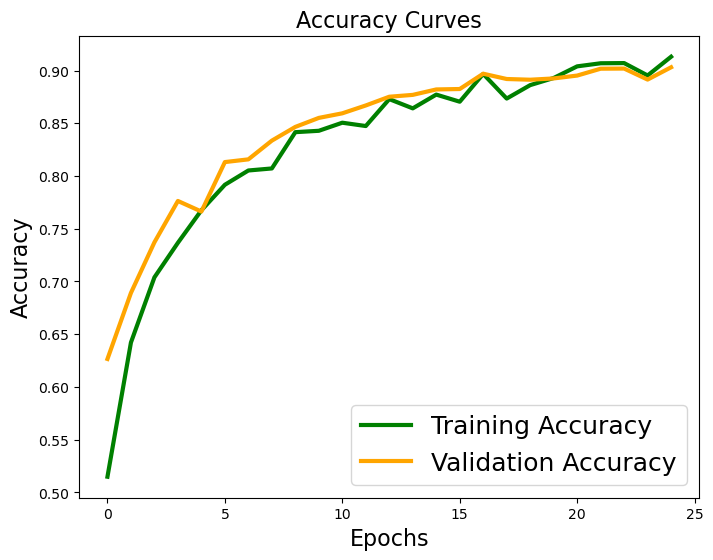

In [127]:
# Accuracy Curves
plt.figure(figsize=[8,6])

# Change colors here
plt.plot(history.history['accuracy'][:last_good_epoch], 'green', linewidth=3.0)  
plt.plot(history.history['val_accuracy'][:last_good_epoch], 'orange', linewidth=3.0)  

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()


Text(0.5, 1.0, 'Loss Curves')

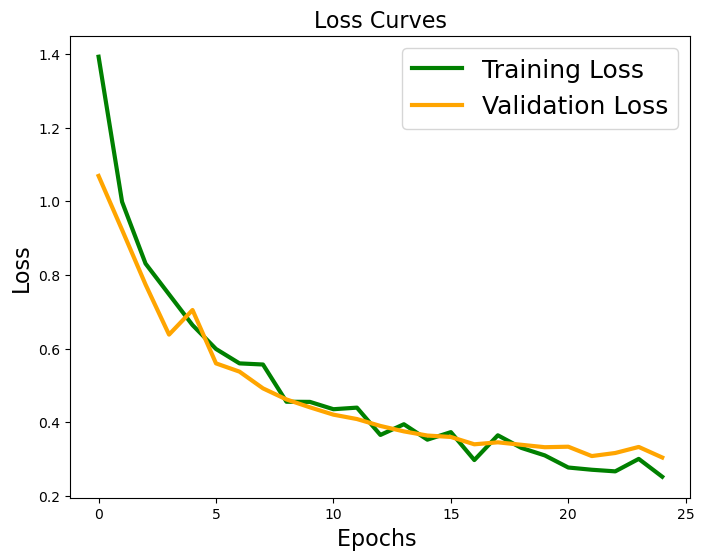

In [129]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'][:last_good_epoch],'green',linewidth=3.0)
plt.plot(history.history['val_loss'][:last_good_epoch],'orange',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [71]:
model.load_weights('best_model.keras')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy: {0:.2f} %".format(test_acc*100))

Test accuracy: 91.53 %


Text(0.5, 1.0, 'Loss Curves')

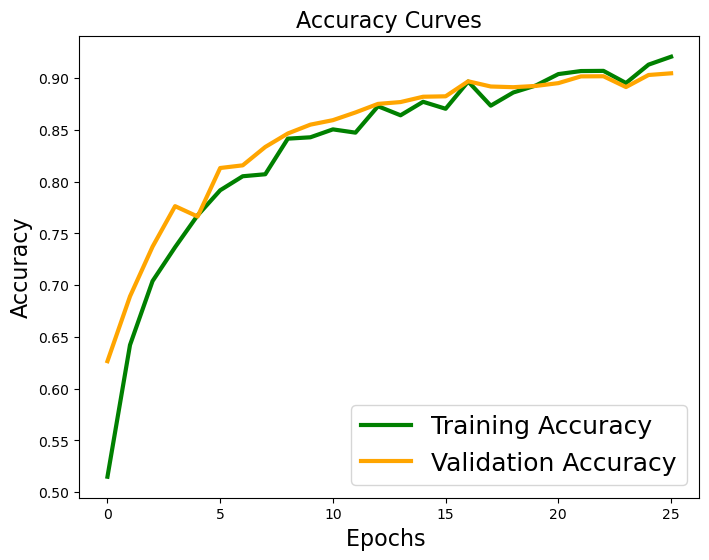

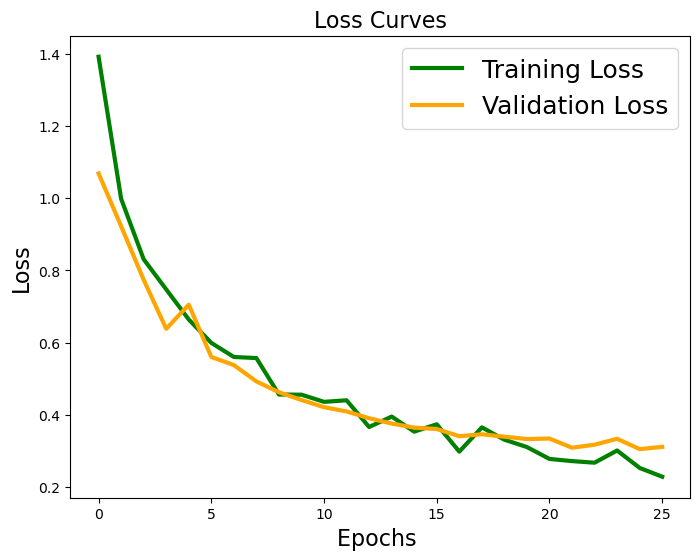

In [131]:
last_good_epoch2 = early_stopping.stopped_epoch - early_stopping.patience + 1

acc_to_plot = history.history['accuracy'][:last_good_epoch] + history2.history['accuracy'][:last_good_epoch2]
val_acc_to_plot = history.history['val_accuracy'][:last_good_epoch] + history2.history['val_accuracy'][:last_good_epoch2]

plt.figure(figsize=[8,6])
plt.plot(acc_to_plot,'green',linewidth=3.0)
plt.plot(val_acc_to_plot,'orange',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


loss_to_plot = history.history['loss'][:last_good_epoch] + history2.history['loss'][:last_good_epoch2]
val_loss_to_plot = history.history['val_loss'][:last_good_epoch] + history2.history['val_loss'][:last_good_epoch2]

plt.figure(figsize=[8,6])
plt.plot(loss_to_plot,'green',linewidth=3.0)
plt.plot(val_loss_to_plot,'orange',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [81]:
epochs = 50
batch_size = 512
history3 = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[checkpointer, early_stopping],
                    validation_data=(x_val, y_val))

Epoch 1/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9653 - loss: 0.1008
Epoch 1: val_loss improved from 0.29320 to 0.29252, saving model to best_model.keras
116/116 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.9653 - loss: 0.1008 - val_accuracy: 0.9160 - val_loss: 0.2925
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9716 - loss: 0.0797
Epoch 2: val_loss did not improve from 0.29252
116/116 ━━━━━━━━━━━━━━━━━━━━ 14s 120ms/step - accuracy: 0.9716 - loss: 0.0797 - val_accuracy: 0.9195 - val_loss: 0.2959
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9728 - loss: 0.0751
Epoch 3: val_loss did not improve from 0.29252
116/116 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - accuracy: 0.9728 - loss: 0.0751 - val_accuracy: 0.9208 - val_loss: 0.3019
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9754 - loss: 0.0682
Epoch 4: val_loss did not improve from 0.29252
116/116 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - accuracy: 0.9754

In [83]:
model.load_weights('best_model.keras')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy: {0:.2f} %".format(test_acc*100))

Test accuracy: 91.79 %


Text(0.5, 1.0, 'Loss Curves')

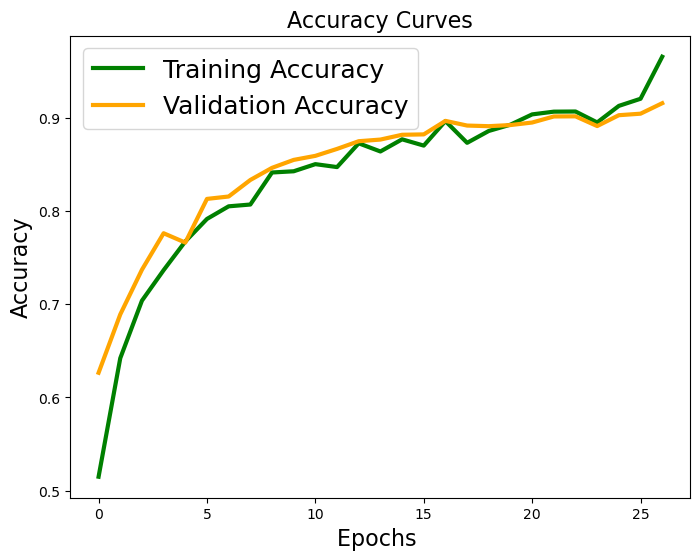

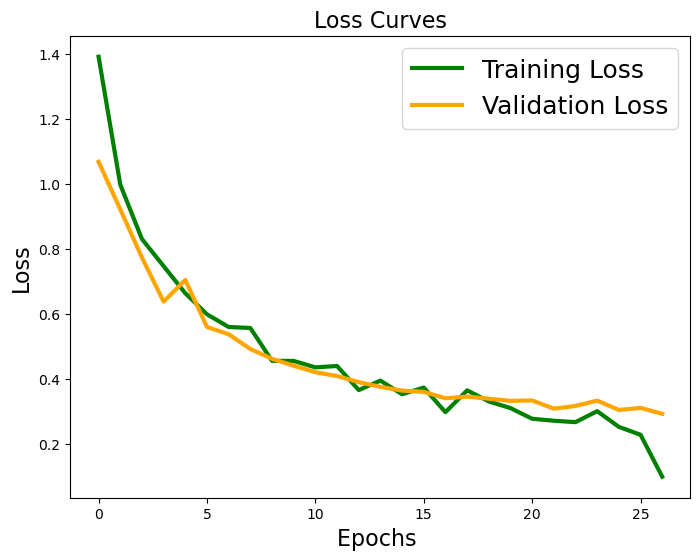

In [133]:
last_good_epoch3 = early_stopping.stopped_epoch - early_stopping.patience + 1

acc_to_plot += history3.history['accuracy'][:last_good_epoch3]
val_acc_to_plot += history3.history['val_accuracy'][:last_good_epoch3]

plt.figure(figsize=[8,6])
plt.plot(acc_to_plot,'green',linewidth=3.0)
plt.plot(val_acc_to_plot,'orange',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

loss_to_plot += history3.history['loss'][:last_good_epoch3]
val_loss_to_plot += history3.history['val_loss'][:last_good_epoch3]

plt.figure(figsize=[8,6])
plt.plot(loss_to_plot,'green',linewidth=3.0)
plt.plot(val_loss_to_plot,'orange',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [87]:
epochs = 50
batch_size = 1024
history4 = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[checkpointer, early_stopping],
                    validation_data=(x_val, y_val))

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.9759 - loss: 0.0712
Epoch 1: val_loss did not improve from 0.29252
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - accuracy: 0.9759 - loss: 0.0712 - val_accuracy: 0.9216 - val_loss: 0.2931
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9778 - loss: 0.0631
Epoch 2: val_loss did not improve from 0.29252
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - accuracy: 0.9778 - loss: 0.0631 - val_accuracy: 0.9211 - val_loss: 0.2982
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9807 - loss: 0.0548
Epoch 3: val_loss did not improve from 0.29252
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.9807 - loss: 0.0548 - val_accuracy: 0.9215 - val_loss: 0.3019
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.9821 - loss: 0.0523
Epoch 4: val_loss did not improve from 0.29252
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - accuracy: 0.9821 - loss: 0.0523 - val_accuracy: 0.9225 - val_loss: 0.3

In [89]:
model.load_weights('best_model.keras')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy: {0:.2f} %".format(test_acc*100))

Test accuracy: 91.79 %


Text(0.5, 1.0, 'Loss Curves')

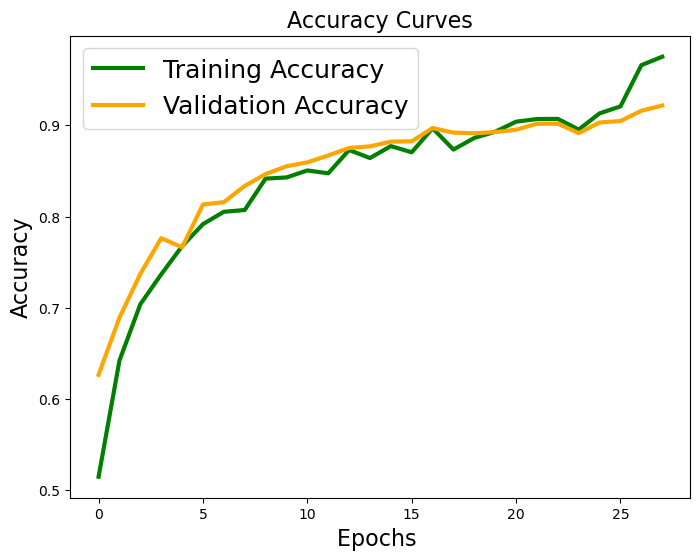

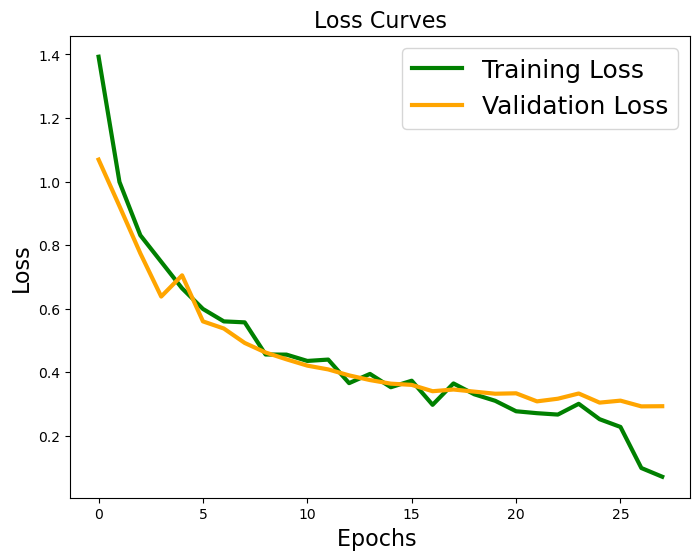

In [135]:
last_good_epoch4 = early_stopping.stopped_epoch - early_stopping.patience + 1

acc_to_plot += history4.history['accuracy'][:last_good_epoch4]
val_acc_to_plot += history4.history['val_accuracy'][:last_good_epoch4]

plt.figure(figsize=[8,6])
plt.plot(acc_to_plot,'green',linewidth=3.0)
plt.plot(val_acc_to_plot,'orange',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


loss_to_plot += history4.history['loss'][:last_good_epoch4]
val_loss_to_plot += history4.history['val_loss'][:last_good_epoch4]

plt.figure(figsize=[8,6])
plt.plot(loss_to_plot,'green',linewidth=3.0)
plt.plot(val_loss_to_plot,'orange',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

## After training, the best model is saved, and the model's performance on test samples is evaluated.

In [99]:
import joblib
import os

# Create the directory if it doesn't exist
os.makedirs('last_models', exist_ok=True)

# Now save the model
model.save("last_models/network.keras")

joblib.dump(scaler, "last_models/scaler")

['last_models/scaler']

# 7.Prediction examples

In [101]:
df = get_dataframe(join(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction\cv-valid-test.csv"))
df.head(10)

,filename,text,up_votes,down_votes,age,gender,accent,duration
1,cv-valid-test/sample-000001.mp3,i've got to go to him,1,0,twenties,male,NaN,NaN
3,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...,4,0,twenties,male,us,NaN
5,cv-valid-test/sample-000005.mp3,down below in the darkness were hundreds of pe...,4,1,twenties,male,us,NaN
6,cv-valid-test/sample-000006.mp3,strange images passed through my mind,3,0,twenties,male,NaN,NaN
7,cv-valid-test/sample-000007.mp3,the sheep had taught him that,2,0,thirties,male,NaN,NaN
8,cv-valid-test/sample-000008.mp3,this was the strangest of all things that ever...,1,0,thirties,male,england,NaN
9,cv-valid-test/sample-000009.mp3,it was glaringly hot not a cloud in the sky no...,3,0,fifties,male,us,NaN
11,cv-valid-test/sample-000011.mp3,they made the boy continue digging but he foun...,2,0,twenties,male,NaN,NaN
14,cv-valid-test/sample-000014.mp3,follow the instructions here,1,0,twenties,male,scotland,NaN
16,cv-valid-test/sample-000016.mp3,the shop is closed on mondays,1,0,twenties,male,NaN,NaN


In [109]:
def test_prediction(df, model, scaler, path):
    features = feature_extraction(path)
    gender = features[0]
    features = scaler.transform(features.reshape(1, -1))  # reshape because we have a single sample
    features = features[0]   # beacause the shape is (1, 24), but we want (24, ) as shape
    features[0] = gender     # in this way the gender will be always +1, 0 or -1

    print("true age:      ", get_age(df, path))
    prediction = model.predict(np.expand_dims(features, axis=0))
    print("predicted age: ", labels[np.argmax(prediction)])
    

# load model and scaler
model = models.load_model("last_models/network.keras")
scaler = joblib.load("last_models/scaler")

path = join(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction\wav-files\cv-valid-test\sample-000001.wav")
play_sound(path)
test_prediction(df, model, scaler, path)

true age:       twenties
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
predicted age:  twenties


In [111]:
path = join(r"C:\Users\Venu Mirapakayala\Downloads\AgePrediction\wav-files\cv-valid-test\sample-000009.wav")
play_sound(path)
test_prediction(df, model, scaler, path)


true age:       fifties
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
predicted age:  fifties


231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


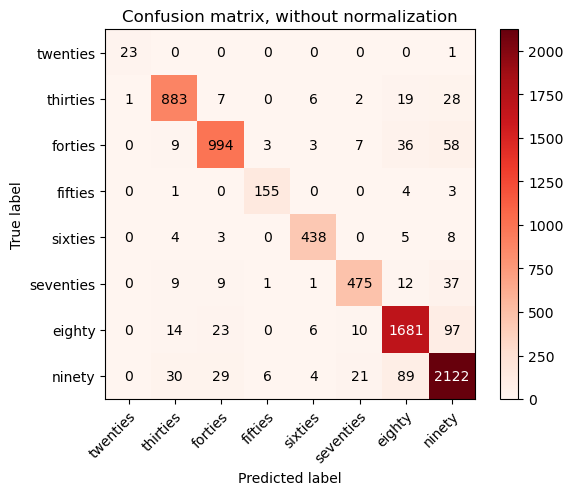

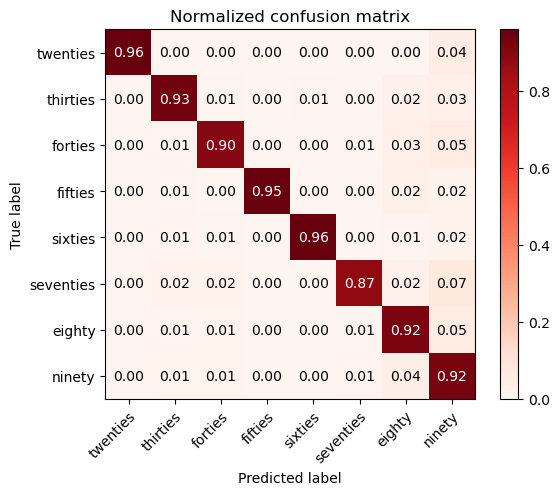

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt
from keras import models

# adapted from scikit-learn tutorial
def plot_confusion_matrix(y_test, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Reds):    
    cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix
    
    # Only use the labels that appear in the data
    classes = [labels[el] for el in unique_labels(y_test, y_pred)]  
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    return ax

# Ensure you have predicted y_pred using your model
model = models.load_model("last_models/network.keras")  # load your trained model
y_pred = model.predict(x_test)  # x_test is the input test data
y_pred = np.asarray([np.argmax(el) for el in y_pred])  # convert to categorical labels

# Define the labels for the age categories
labels = ['twenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies', 'eighty', 'ninety']

# Plot confusion matrix with the desired color map
plot_confusion_matrix(y_test, y_pred, classes=labels, title='Confusion matrix, without normalization', cmap=plt.cm.Reds)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Reds)

plt.show()
